In [1]:
import sys
from importlib import reload 
sys.path.append('./lib')

In [2]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [3]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [4]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [5]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [7]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("euclidian", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("euclidian_corrected", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_2(for_ranking=True):
    # + not-ranking  (not-corrected euclidean version)
    return [
        ProductDistances([
            (10, Distances("euclidian", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("euclidian_corrected", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]

def make_distances_3():
    return [
        ProductDistances([
            (11, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (6, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_exp_dot(k=1):
    return [
        ProductDistances([
            (10, Distances("exp_minus_dot", scalable=True))
        ], "sum")
        for _ in range(k)
    ]


def make_distances_4():
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
    ]


def make_distances_osw(for_ranking=True):
    # + not-ranking  (not-corrected euclidean version)
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum")
    ]


def make_distances_ttl2(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l2", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l2_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l2_hs", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l2_sq_hs", scalable=True))
        ], "sum"),
    ]



def make_distances_ttl2_lite(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l2_hs", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l2_sq_hs", scalable=True))
        ], "sum"),
    ]


def make_distances_ttl2_sq_hs(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l2_sq_hs", scalable=True))
        ], "sum"),
    ]

def make_distances_ttl3(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l3", scalable=True))
        ], "sum"),
    ]


def get_dists_weights(dists):
    return [x.get_weights() for x in dists]

def get_dists_weights_osw(dists):
    for dist in dists:
        w = dist.get_weights()
        smw = w[0].numpy() * tf.nn.softmax(w[1]).numpy()
        print(dist, ":", smw / smw.sum())
    return [x.get_weights() for x in dists]

_____________


### USCA312 fake product spaces example
**(no exponential map, just default gradients & adam optimizer)**

In [8]:
_, distances_matrix = utils.get_dataset("usca312")

Loading from ../datasets/usca312.edges


In [9]:
distances_matrix

array([[0.   , 1.167, 1.579, ..., 1.209, 0.866, 1.112],
       [1.167, 0.   , 0.413, ..., 0.045, 1.904, 0.082],
       [1.579, 0.413, 0.   , ..., 0.37 , 2.312, 0.467],
       ...,
       [1.209, 0.045, 0.37 , ..., 0.   , 1.95 , 0.107],
       [0.866, 1.904, 2.312, ..., 1.95 , 0.   , 1.87 ],
       [1.112, 0.082, 0.467, ..., 0.107, 1.87 , 0.   ]])

In [10]:
d = make_model()
qs = d.sparse_arange(312)  # queries
r_matrix = np.mean(distances_matrix <= 1.)  # not used
distances_matrix.shape

(312, 312)

In [11]:
dists = make_distances_ttl3(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

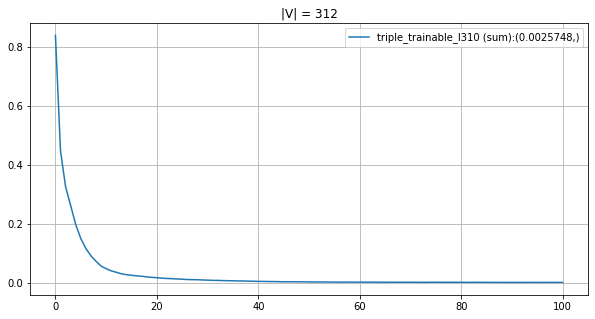


0.0025748	triple_trainable_l310 (sum)


In [12]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [13]:
get_dists_weights_osw(dists)

triple_trainable_l310 (sum) : [6.45961233e-04 6.00230559e-04 7.95215432e-04 1.18990756e-03
 2.14569304e-03 7.95215432e-04 5.12452932e-04 6.53701257e-04
 7.95215432e-04 8.85391792e-04 2.64280598e-03 7.95215432e-04
 2.21438789e-03 4.43595650e-03 7.95215432e-04 4.44999284e-04
 2.01996905e-04 7.95215432e-04 2.40516303e-03 6.61582813e-03
 7.95215432e-04 7.72769346e-04 3.26040062e-04 1.43907103e-03
 7.13466047e-04 1.43403597e-04 1.16542785e-03 1.12647139e-03
 2.05573565e-04 2.51879907e-03 2.77046395e-03 1.47266272e-03
 4.62884271e-02 4.13883426e-04 1.33024506e-04 5.74414757e-04
 9.33020746e-04 1.22860467e-04 1.83376741e-03 9.89131853e-04
 1.50114078e-04 1.92266283e-03 2.24728582e-03 1.55639925e-03
 8.99019875e-01]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.3999334834462722>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(45,) dtype=float64, numpy=
  array([-0.59884985, -0.67227549, -0.39097628,  0.01204156,  0.60162854,
         -0.39097628, -0.83038047, -0.58693889, -0.39097628, -0.28355909,
          0.81000716, -0.39097628,  0.63314196,  1.3279092 , -0.39097628,
         -0.97151667, -1.76133696, -0.39097628,  0.71578363,  1.72763092,
         -0.39097628, -0.41960872, -1.28256908,  0.20216373, -0.49945449,
         -2.10392633, -0.00874578, -0.04274398, -1.74378539,  0.76194817,
          0.85718074,  0.22523808,  3.67305791, -1.04400499, -2.17905597,
         -0.71623763, -0.2311619 , -2.25854004,  0.44453848, -0.1727617 ,
         -2.05819381,  0.49187706,  0.64788912,  0.28054092,  6.63947108])>]]

__________________

# CS PhDs

In [14]:
G, distances_matrix = utils.get_dataset(distances_matrix=True)

Loading from ../datasets/CSPhDs.edges
|V| = 1025, |E| = 1043


In [15]:
def make_model_g(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = np.mean(distances_matrix <= 1.)
distances_matrix.shape

(1025, 1025)

In [16]:
dists = make_distances_ttl3(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

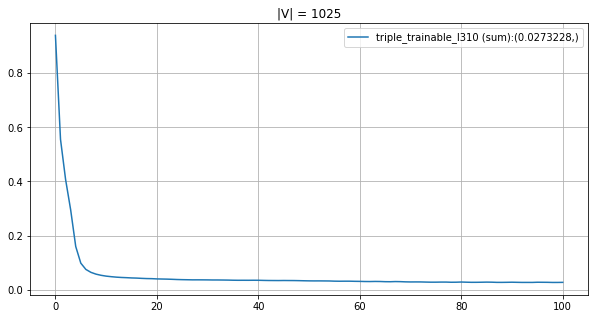


0.0273228	triple_trainable_l310 (sum)


In [17]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [18]:
get_dists_weights_osw(dists)

triple_trainable_l310 (sum) : [1.11329070e-03 1.21252607e-04 1.28405838e-04 9.96550492e-02
 1.45734361e-04 1.28405838e-04 1.75240631e-01 2.34228780e-04
 1.28405838e-04 1.53544518e-04 1.71300144e-04 1.28405838e-04
 2.37424398e-01 7.80698367e-04 1.28405838e-04 1.87732410e-03
 2.54168591e-04 1.28405838e-04 6.20703934e-02 2.28877458e-03
 1.28405838e-04 3.28536518e-05 9.77009506e-05 5.53579774e-05
 2.88468474e-05 1.48988663e-04 2.07452431e-05 4.69438929e-05
 1.32816718e-04 3.35501865e-04 4.81368557e-04 5.30531777e-02
 4.59056350e-04 2.99256797e-05 3.62733733e-04 2.12550891e-05
 2.37209082e-05 1.42385851e-04 1.37282522e-05 5.00051047e-05
 1.52794426e-03 4.55579655e-05 1.11743125e-04 3.60196652e-01
 1.51360532e-04]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.490259100943502>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(45,) dtype=float64, numpy=
  array([-0.58520595, -2.80240542, -2.74508559,  3.90918854, -2.61849593,
         -2.74508559,  4.47363389, -2.14398312, -2.74508559, -2.56629091,
         -2.45686421, -2.74508559,  4.77732308, -0.94009259, -2.74508559,
         -0.06267876, -2.06228366, -2.74508559,  3.43574295,  0.13549038,
         -2.74508559, -4.10821855, -3.01837016, -3.58646068, -4.23828074,
         -2.59641124, -4.56796448, -3.75132833, -2.71131134, -1.78465394,
         -1.42364824,  3.27876859, -1.47110848, -4.20156449, -1.7066124 ,
         -4.5436851 , -4.43392459, -2.64174082, -4.98082554, -3.68815636,
         -0.26860296, -3.78129597, -2.88407874,  5.19412396, -2.58061683])>]]

__________________

# POWER

In [33]:
G, distances_matrix = utils.get_dataset("power", distances_matrix=True)

Loading from ../datasets/power.edges
|V| = 4941, |E| = 6594


In [34]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = np.mean(distances_matrix <= 1.)
distances_matrix.shape

(4941, 4941)

In [35]:
dists = make_distances_ttl3(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

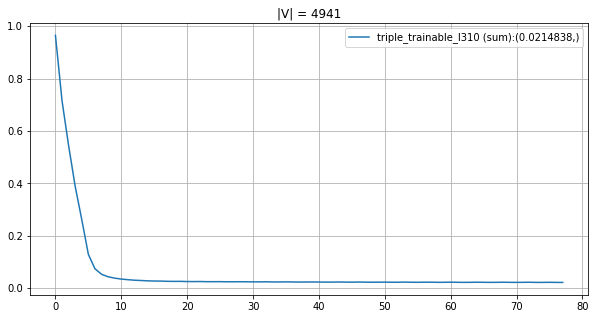

1541:0.02151992744913829
1542:0.02167070200759138
1543:0.021888964867172008
1544:0.022107835073272124
1545:0.021908881353037896
1546:0.021686339158431114
1547:0.02151934931440508
1548:0.021473382787959697
1549:0.021480740842438038
1550:0.02155812124237366
1551:0.021710544696832697
1552:0.021900965349563695
1553:0.022101358584892712


In [ ]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20
)

In [ ]:
get_dists_weights_osw(dists)

In [38]:
get_dists_weights_osw(dists)

triple_trainable_l310 (sum) : [7.19346804e-02 3.19589469e-04 7.36573118e-05 2.12759737e-01
 6.53005525e-04 7.36573118e-05 2.31833296e-01 3.79478599e-04
 7.36573118e-05 9.76420247e-05 2.84695014e-04 7.36573118e-05
 1.61245173e-04 7.60230395e-02 7.36573118e-05 3.23674738e-05
 1.62398511e-04 7.36573118e-05 1.05803073e-04 7.87886315e-04
 7.36573118e-05 4.37575670e-05 8.12616004e-04 8.35485070e-05
 4.48495820e-05 2.48969779e-04 2.07473899e-03 6.41729645e-05
 1.21720392e-02 6.10335573e-04 6.36012830e-05 3.85046957e-01
 2.75219705e-04 2.81740820e-05 1.19981335e-04 2.28200726e-05
 2.92538672e-05 2.31156470e-04 2.74764548e-05 2.92487431e-05
 2.59073006e-04 2.01687725e-05 6.21371251e-05 1.22523713e-03
 3.54001334e-04]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=6.883107529973755>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(45,) dtype=float64, numpy=
  array([ 3.56030432, -1.85617219, -3.32378604,  4.64470936, -1.14162386,
         -3.32378604,  4.73056439, -1.68441125, -3.32378604, -3.04190147,
         -1.97179097, -3.32378604, -2.54028344,  3.61558227, -3.32378604,
         -4.14605543, -2.53315619, -3.32378604, -2.96162989, -0.95385565,
         -3.32378604, -3.8445449 , -0.92295078, -3.19778207, -3.81989518,
         -2.10587794,  0.01438118, -3.46162745,  1.78368728, -1.20920053,
         -3.47057581,  5.23791112, -2.00563975, -4.28480698, -2.83587327,
         -4.49556893, -4.24719768, -2.18011461, -4.30988   , -4.24737285,
         -2.06609955, -4.61907396, -3.49386582, -0.51231978, -1.75390877])>]]

In [41]:
total_loss_story[0][-1]

(0.0209617,)

_______________________

# Facebook

In [28]:
G, distances_matrix = utils.get_dataset("facebook", distances_matrix=True)

Loading from ../datasets/facebook.edges
|V| = 4039, |E| = 88234


In [29]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = 1. * (distances_matrix <= 1.)
distances_matrix.shape

(4039, 4039)

In [30]:
dists = make_distances_ttl3(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

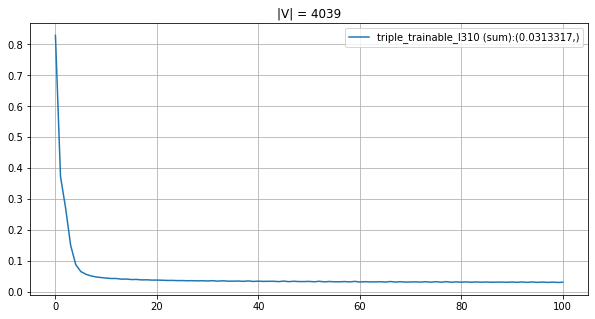

In [31]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

In [32]:
get_dists_weights_osw(dists)

triple_trainable_l310 (sum) : [1.56403346e-01 2.67979339e-04 1.43094084e-03 5.12347278e-02
 9.61083101e-04 1.43094084e-03 6.30336011e-02 2.02484855e-04
 1.43094084e-03 1.25107970e-04 3.18480843e-04 1.43094084e-03
 5.62568491e-03 1.54604051e-01 1.43094084e-03 4.31591313e-05
 9.10027451e-05 1.43094084e-03 1.56714079e-03 1.21707839e-03
 1.43094084e-03 6.54813325e-05 2.80149135e-04 3.06411197e-05
 9.50613445e-05 4.19251164e-04 3.16717890e-05 2.93149069e-04
 4.43007746e-03 9.66012443e-05 4.38708965e-03 3.12443704e-01
 5.32615482e-02 3.59513269e-05 9.50099419e-05 1.82858455e-05
 3.53959282e-05 1.03969557e-04 1.65454631e-05 2.30713031e-03
 5.24350521e-03 1.82631173e-02 2.05220831e-04 1.51819735e-01
 3.10193728e-04]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.3651155997522466>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(45,) dtype=float64, numpy=
  array([ 3.5807622 , -2.78852142, -1.11334386,  2.46474156, -1.51137042,
         -1.11334386,  2.67199192, -3.06876621, -1.11334386, -3.55025418,
         -2.61586897, -1.11334386,  0.25566668,  3.56919132, -1.11334386,
         -4.61453729, -3.86854163, -1.11334386, -1.02242321, -1.2752228 ,
         -1.11334386, -4.1976662 , -2.74410921, -4.95708841, -3.82490888,
         -2.34096112, -4.92400495, -2.69875005,  0.01674105, -3.80883968,
          0.00699004,  4.27274829,  2.50353863, -4.79726531, -3.82544976,
         -5.47330401, -4.81283451, -3.73533317, -5.57331937, -0.63567156,
          0.18531419,  1.43320756, -3.05534468,  3.55101785, -2.64223427])>]]

______________________
## Wiki 
### aka WLA6 - bfs on Wikipedia categories from Linear Algebra, depth = 6

In [23]:
G, distances_matrix = utils.get_dataset("wla6", distances_matrix=True)

Loading from ../datasets/wla6.edges
|V| = 3227, |E| = 3604


In [24]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = 1. * (distances_matrix <= 1.)
distances_matrix.shape

(3227, 3227)

In [25]:
dists = make_distances_ttl3(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

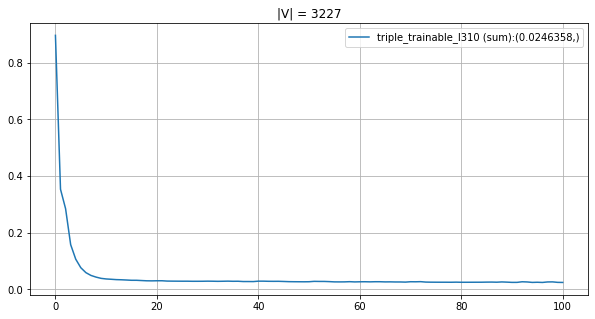

In [26]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

In [27]:
get_dists_weights_osw(dists)

triple_trainable_l310 (sum) : [4.95236615e-01 1.52934320e-03 3.28482617e-04 7.79711531e-02
 1.70424677e-03 3.28482617e-04 5.25473371e-03 9.12607844e-04
 3.28482617e-04 1.18696873e-04 2.77057415e-04 3.28482617e-04
 9.65718926e-04 1.39092388e-02 3.28482617e-04 1.02015516e-04
 3.06219592e-04 3.28482617e-04 2.57454484e-04 6.66072791e-03
 3.28482617e-04 1.20456032e-04 4.16752490e-04 4.80824850e-04
 7.80752240e-05 2.22688600e-04 2.21113772e-04 1.82165586e-04
 3.42137597e-03 7.82624939e-03 1.40951899e-03 2.01859845e-01
 5.92452153e-04 5.68797991e-05 1.02179924e-04 4.44920157e-05
 1.67382801e-04 7.29570291e-03 8.31243548e-05 1.01597210e-04
 1.38684024e-04 1.08395344e-04 4.32599833e-04 1.67039756e-01
 9.24806778e-05]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.670224711984006>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(45,) dtype=float64, numpy=
  array([ 5.06400972, -0.71618757, -2.2542973 ,  3.21531299, -0.6079027 ,
         -2.2542973 ,  0.51810339, -1.23247495, -2.2542973 , -3.27220826,
         -2.42455646, -2.2542973 , -1.17590839,  1.49152734, -2.2542973 ,
         -3.4236563 , -2.32447875, -2.2542973 , -2.49793827,  0.75520284,
         -2.2542973 , -3.25749641, -2.01628872, -1.87327815, -3.69110844,
         -2.64300683, -2.65010384, -2.84386513,  0.08901686,  0.91645745,
         -0.79777743,  4.16654768, -1.6645111 , -4.00784096, -3.422046  ,
         -4.25347147, -2.92849781,  0.84625959, -3.62844348, -3.42776514,
         -3.11658308, -3.36299608, -1.97896809,  3.97720591, -3.52178148])>]]

# eu Core

In [19]:
G, distances_matrix, r_matrix  = utils.get_dataset("eu-core.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/eu-core.edges
|V| = 986, |E| = 16687


In [20]:
dists = make_distances_ttl3(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

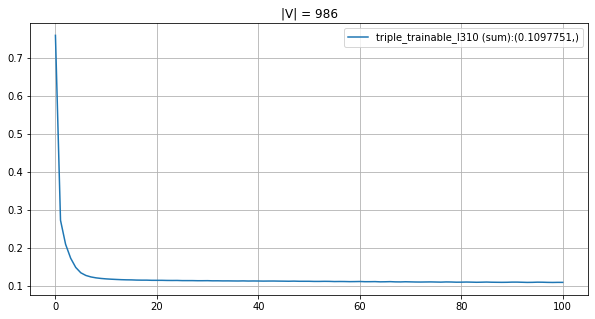

In [21]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

In [22]:
get_dists_weights_osw(dists)

triple_trainable_l310 (sum) : [0.28721847 0.00039329 0.00183199 0.03708929 0.00059433 0.00183199
 0.27886637 0.0004821  0.00183199 0.00108313 0.00045429 0.00183199
 0.10776725 0.00714798 0.00183199 0.00054585 0.00059673 0.00183199
 0.0006449  0.00046023 0.00183199 0.00126632 0.00086855 0.06115489
 0.00037131 0.00035905 0.00684577 0.00077335 0.00076315 0.01056092
 0.00346157 0.16457343 0.00057337 0.00036574 0.00050487 0.00455068
 0.00053104 0.00059957 0.00225538 0.00033825 0.00048913 0.00129897
 0.00036505 0.00047187 0.00048965]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.7071840084940267>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(45,) dtype=float64, numpy=
  array([ 4.8801385 , -1.71330487, -0.17470328,  2.8332236 , -1.30042491,
         -0.17470328,  4.85062807, -1.50971477, -0.17470328, -0.70024838,
         -1.56913133, -0.17470328,  3.8998692 ,  1.18672498, -0.17470328,
         -1.38551145, -1.29640301, -0.17470328, -1.21876262, -1.55613356,
         -0.17470328, -0.54398717, -0.92104051,  3.33330524, -1.77083258,
         -1.80440457,  1.14352652, -1.03712597, -1.05040744,  1.57705611,
          0.46161757,  4.32325224, -1.33632582, -1.78594303, -1.46355199,
          0.73517186, -1.41303108, -1.29165468,  0.03321544, -1.86407473,
         -1.49522236, -0.51853325, -1.78783183, -1.53115487, -1.4941663 ])>]]